# Draw a schematic of the damping layer in GungHo

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import paths
import pouch
from pouch.plot import figsave

In [2]:
def damping_layer_func(
    height, dl_strength, dl_base_height, domain_top, latitude, taper_lat=50
):
    """
    Mimic the damping layer function in GungHo.

    See source/kernel/compute_dl_matrix_kernel_mod.F90
    """
    height, latitude = np.meshgrid(height, np.clip(latitude, -50, 50))
    height_star = domain_top + (height - domain_top) * np.cos(np.deg2rad(latitude))

    dl_val = (
        dl_strength
        * np.sin(
            0.5 * np.pi * (height_star - dl_base_height) / (domain_top - dl_base_height)
        )
        ** 2
    )

    dl_val[height_star < dl_base_height] = 0
    return dl_val

## Parameters

In [3]:
domain_top = 32_000
dl_base_height = 24_000
taper_lat = 50
dl_str = 1.0
heights = np.linspace(0, domain_top, 33)
latitudes = np.linspace(-90, 90, 21)

## Calculate two different profiles

In [4]:
dl_latitude_values = damping_layer_func(
    heights, dl_str, dl_base_height, domain_top, latitudes, taper_lat=taper_lat
)
dl_standard_values = damping_layer_func(
    heights, dl_str, dl_base_height, domain_top, 0.0 * latitudes, taper_lat=taper_lat
)

## Plot the profiles

In [5]:
plt.style.use("custom.mplstyle")
pouch.RUNTIME.figsave_stamp = False

Saved to ../figures/drafts/schematic_gungho_damping_layer_options.pdf.png


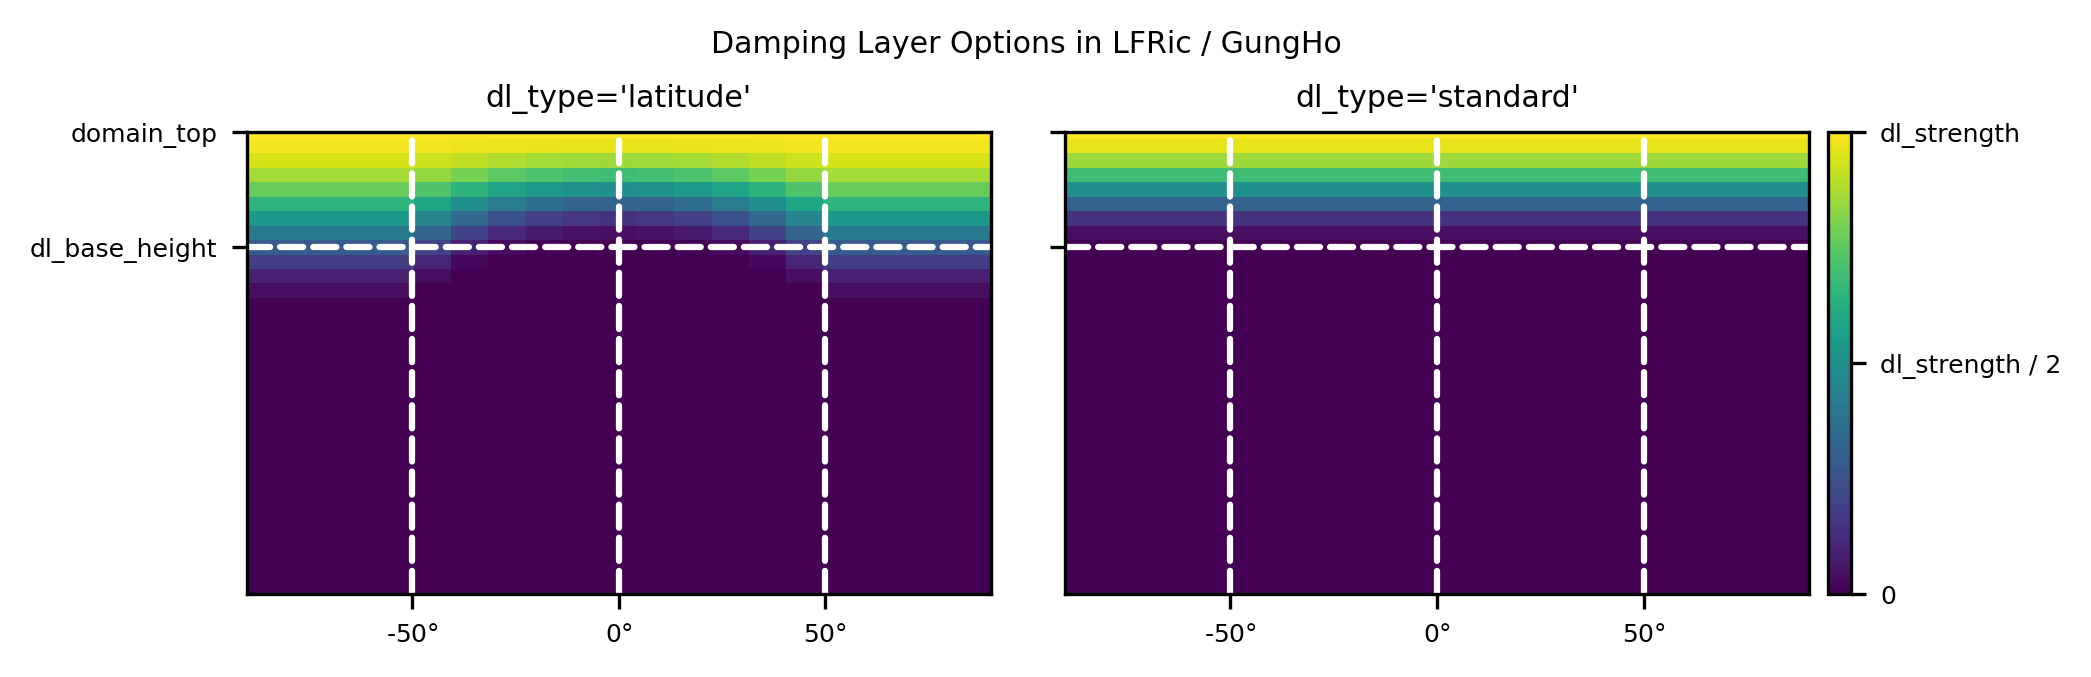

In [6]:
fig, axs = plt.subplots(
    ncols=2, figsize=(8, 2), sharex=True, sharey=True, gridspec_kw={"wspace": 0.1}
)
for ax in axs:
    lats_to_label = [-taper_lat, 0, taper_lat]
    ax.set_xticks(lats_to_label)
    ax.set_xticklabels([f"{i}$\degree$" for i in lats_to_label])
    ax.set_xlim(-90, 90)
    ax.set_ylim(0, domain_top)
    ax.set_yticks([dl_base_height, domain_top])
    ax.set_yticklabels(["dl_base_height", "domain_top"])
    for lat in [-taper_lat, 0, taper_lat]:
        ax.axvline(lat, color="w", linestyle="--", dash_capstyle="round")
    ax.axhline(dl_base_height, color="w", linestyle="--", dash_capstyle="round")
axs[0].set_title("dl_type='latitude'")
p = axs[0].pcolormesh(
    latitudes, heights, dl_latitude_values.T, vmin=0, vmax=1, rasterized=True
)
axs[1].set_title("dl_type='standard'")
p = axs[1].pcolormesh(
    latitudes, heights, dl_standard_values.T, vmin=0, vmax=1, rasterized=True
)
cbar = fig.colorbar(p, ax=axs, pad=0.01)
cbar.set_ticks([0, 0.5, 1])
cbar.set_ticklabels(["0", "dl_strength / 2", "dl_strength"])
fig.suptitle("Damping Layer Options in LFRic / GungHo", y=1.05, x=0.45)
figsave(
    fig,
    paths.figures / "drafts" / "schematic_gungho_damping_layer_options.pdf",
)